# 회구 연습문제
- section 01 : 항공권 가격 예측
- section 02 : 노트북 가격 예측
- section 03 : 중고차 가격 예측

## Section 01 : 항공권 가격 예측
- 항공권 티켓 가격을 예측하시오.
- 데이터
    - train : flight_train.csv
    - test  : flight_test.csv

- pred(예측값) : 가격
- 성능 RMSE 평가 지표에 따라 채점


In [7]:
import pandas as pd

train = pd.read_csv('./ch8_data/flight_train.csv')
test = pd.read_csv('./ch8_data/flight_test.csv')

print("Train",train.shape)
print("Test",test.shape)

Train (10505, 11)
Test (4502, 10)


In [8]:
train.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [9]:
test.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10505 entries, 0 to 10504
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           10505 non-null  object 
 1   flight            10505 non-null  object 
 2   source_city       10505 non-null  object 
 3   departure_time    10505 non-null  object 
 4   stops             10505 non-null  object 
 5   arrival_time      10505 non-null  object 
 6   destination_city  10505 non-null  object 
 7   class             10505 non-null  object 
 8   duration          10505 non-null  float64
 9   days_left         10505 non-null  int64  
 10  price             10505 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 902.9+ KB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4502 entries, 0 to 4501
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           4502 non-null   object 
 1   flight            4502 non-null   object 
 2   source_city       4502 non-null   object 
 3   departure_time    4502 non-null   object 
 4   stops             4502 non-null   object 
 5   arrival_time      4502 non-null   object 
 6   destination_city  4502 non-null   object 
 7   class             4502 non-null   object 
 8   duration          4502 non-null   float64
 9   days_left         4502 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 351.8+ KB


In [13]:
cols = train.select_dtypes(include='object').columns
for col in cols:
    set_train = set(train[col])
    set_test = set(test[col])
    same = (set_train == set_test)
    if same:
        print(col,"\t 카테고리 동일")
    else:
        print(col,"\t 카테고리 동일하지 않음")

airline 	 카테고리 동일
flight 	 카테고리 동일하지 않음
source_city 	 카테고리 동일
departure_time 	 카테고리 동일
stops 	 카테고리 동일
arrival_time 	 카테고리 동일
destination_city 	 카테고리 동일
class 	 카테고리 동일


In [14]:
train['flight'].value_counts()

flight
UK-706     108
UK-832      99
UK-720      98
UK-828      98
UK-822      97
          ... 
6E-307       1
G8-7553      1
6E-796       1
6E-939       1
SG-5002      1
Name: count, Length: 1153, dtype: int64

In [17]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 56.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 67.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 59.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


Matplotlib is building the font cache; this may take a moment.


<Axes: >

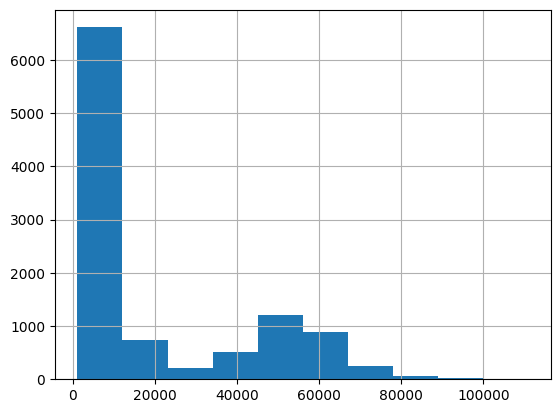

In [18]:
train['price'].hist()

In [19]:
target = train.pop("price")

train = train.drop('flight',axis=1)
test = test.drop('flight',axis=1)

In [20]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [21]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state=0
)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(X_tr,y_tr, )

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
pred =rf.predict(X_val)
pred

array([ 6157.57, 11883.28,  7124.69, ..., 47457.72,  5117.65, 43706.72],
      shape=(2101,))

In [25]:
from sklearn.metrics import root_mean_squared_error

result =root_mean_squared_error(y_val,pred)
print("RMSE : ", result)

RMSE :  4376.841613585934


In [27]:
pred = rf.predict(test)

submit = pd.DataFrame({"pred":pred})
submit.to_csv("./ch8_data/section1_result1.csv", index=False)

### 성능 개선
- flight 컬럼 제외
- 포함하되 중복은 제외 -> 일부만 포함

- 데이터 전처리
    - 레이블 인코딩 : 효과 x
    - 스케일링 : Standard Scaler가 가장좋음.
    - flight 컬럼 : 앞의 영문은 airline의 약자 -> 숫자만 활용

- 하이퍼 파라미터 튜닝
    - max_depth : 10~20
    - n_estimators:200,500

In [32]:
import pandas as pd

train = pd.read_csv('./ch8_data/flight_train.csv')
test = pd.read_csv('./ch8_data/flight_test.csv')

In [33]:
target = train.pop("price")


In [34]:
train['f2'] = train['flight'].str.split('-').str[1].astype(int)
test['f2'] = test['flight'].str.split('-').str[1].astype(int)

train = train.drop('flight',axis=1)
test = test.drop('flight',axis=1)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
scaler = StandardScaler()
cols = ['duration','days_left']

train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])

In [37]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [40]:
from sklearn.model_selection import train_test_split
X_tr,X_val,y_tr,y_val = train_test_split(
    train,
    target,
    test_size=0.2,
    random_state=0
)

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 20, n_estimators=200, random_state=0)
rf.fit(X_tr,y_tr)
pred = rf.predict(X_val)

In [45]:
from sklearn.metrics import root_mean_squared_error
result = root_mean_squared_error(y_val,pred)
print('rsme: ', result)

rsme:  3675.155093297134


In [50]:
pred = rf.predict(test)
submit = pd.DataFrame({'pred':pred})
submit.to_csv("./ch8_data/section1_result2.csv", index=False)

## Section 02 : 노트북 정보로 가격을 예측하시오.
- 노트북 정보로 가격을 예측하시오.
- 데이터
    - train : laptop_train.csv
    - test  : laptop_test.csv

- pred(예측값) : 가격
- 성능 RMSE 평가 지표에 따라 채점
